In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
df

,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,1992,12,13,-4.99,156.00,4.8,-2.8,78.5,28.98,30.06
1,1989,5,14,0.00,-110.10,-2.5,2.4,NaN,24.95,25.23
2,1993,6,28,2.04,-110.20,-4.5,5.9,NaN,25.78,27.84
3,1995,1,8,1.98,-140.00,-7.7,1.2,82.6,26.47,26.86
4,1995,2,21,5.01,-170.00,-5.4,-6.6,75.2,28.83,28.90
...,...,...,...,...,...,...,...,...,...,...
104404,1989,10,17,9.04,-140.20,NaN,NaN,NaN,NaN,27.80
104405,1995,10,20,-5.00,-180.00,-3.2,-2.9,73.8,28.31,29.44
104406,1984,11,18,0.06,-110.06,-4.0,3.2,NaN,NaN,21.10
104407,1996,12,22,-0.01,-155.00,-6.9,-2.1,78.1,25.81,25.95


In [2]:
df.apply(pd.isnull).sum()/df.shape[0]

year         0.000000
month        0.000000
day          0.000000
latitude     0.000000
longitude    0.000000
zon.winds    0.139547
mer.winds    0.139547
humidity     0.371558
air temp.    0.075070
s.s.temp.    0.000000
dtype: float64

In [3]:
df.dtypes

year           int64
month          int64
day            int64
latitude     float64
longitude    float64
zon.winds    float64
mer.winds    float64
humidity     float64
air temp.    float64
s.s.temp.    float64
dtype: object

In [4]:
# Filling the null values 
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(df)

imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

In [5]:
imputed_df.apply(pd.isnull).sum()/imputed_df.shape[0]

year         0.0
month        0.0
day          0.0
latitude     0.0
longitude    0.0
zon.winds    0.0
mer.winds    0.0
humidity     0.0
air temp.    0.0
s.s.temp.    0.0
dtype: float64

USING LINEAR REGRESSION MODEL

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import time

start_time = time.time()

X = imputed_df[['latitude', 'longitude', 'zon.winds', 'mer.winds', 'humidity', 'air temp.', 'day', 'month', 'year']]
y = imputed_df['s.s.temp.']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

# Initialise and train the model (regression model)
mod1 = LinearRegression()
mod1.fit(X_train, y_train)

# Make predictions
pred1 = mod1.predict(X_test)

# Calculate r2 score, MSE and run time
r2 = r2_score(y_test, pred1)
mse = mean_squared_error(y_test, pred1)

end_time = time.time()

print("R2 score:", r2)
print("Mean Squared Error:", mse)
print("Run time:", end_time - start_time)

R2 score: 0.937024072951327
Mean Squared Error: 0.2975831118980672
Run time: 0.03978872299194336


USING K-NEAREST NEIGHBORS REGRESSOR 

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import time

start_time = time.time()

X = imputed_df[['latitude', 'longitude', 'zon.winds', 'mer.winds', 'humidity', 'air temp.', 'day', 'month', 'year']]
y = imputed_df['s.s.temp.']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialise and train the knn classifier
mod2 = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2) 
mod2.fit(X_train, y_train)

# Make predictions on the test set
pred2 = mod2.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, pred2)
mse = mean_squared_error(y_test, pred2)

end_time = time.time()

print("R2 score:", r2)
print("Mean Squared Error:", mse)
print("Run time:", end_time - start_time)

R2 score: 0.9707751249197778
Mean Squared Error: 0.1380976776170865
Run time: 2.2161316871643066


USING NEURAL NETWORK (Feedforward Neural Network)

Epoch 1/100


2089/2089 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 89.9663 - val_loss: 0.7013 - learning_rate: 0.0010
Epoch 2/100
2089/2089 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4602 - val_loss: 0.2630 - learning_rate: 0.0010
Epoch 3/100
2089/2089 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2543 - val_loss: 0.2754 - learning_rate: 0.0010
Epoch 4/100
2089/2089 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2227 - val_loss: 0.1949 - learning_rate: 0.0010
Epoch 5/100
2089/2089 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2050 - val_loss: 0.2084 - learning_rate: 0.0010
Epoch 6/100
2089/2089 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1967 - val_loss: 0.2190 - learning_rate: 0.0010
Epoch 7/100
2089/2089 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1945 - val_loss: 0.1715 - learning_rate: 0.0010
Epoch 8/100
2089/2089 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1859 - val_loss: 0.1787 - learning_rate: 0.0010
Epoch 9/100
2089/2089 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1785 - val_loss: 0.1878 - learning_rate: 0

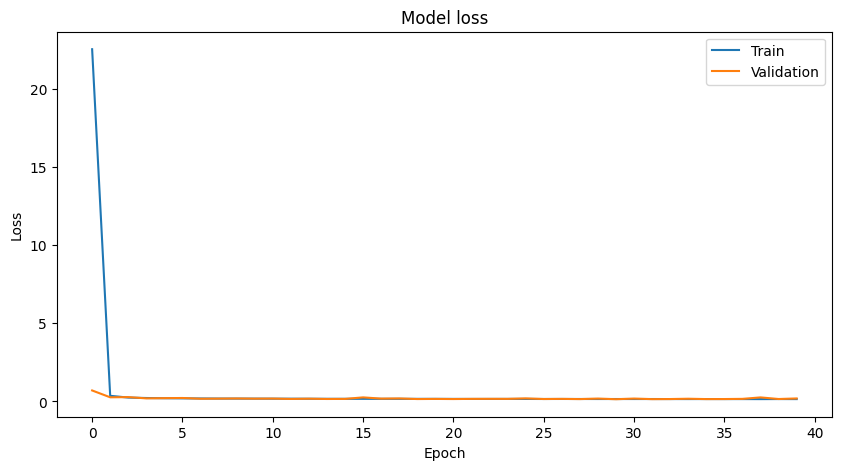

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import time

start_time = time.time()

X = imputed_df[['latitude', 'longitude', 'zon.winds', 'mer.winds', 'humidity', 'air temp.', 'day', 'month', 'year']]
y = imputed_df['s.s.temp.']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Define the model
mod3 = Sequential()
mod3.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
mod3.add(Dense(units=32, activation='relu'))
mod3.add(Dense(units=16, activation='relu'))
mod3.add(Dense(units=1, activation='linear'))

#Compile the model
mod3.compile(optimizer='adam', loss='mean_squared_error')

#Define early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

#Train the model
history = mod3.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=1)


#Evaluate the model
loss = mod3.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

#Make predictions
pred3 = mod3.predict(X_test)

r2 = r2_score(y_test, pred3)
mse = mean_squared_error(y_test, pred3)

end_time = time.time()

print("R2 score:", r2)
print("Mean Squared Error:", mse)
print("Run time:", end_time - start_time)

#Plot learning curves
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

USING RANDOM FOREST REGRESSOR 

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import time

start_time = time.time()

X = imputed_df[['latitude', 'longitude', 'zon.winds', 'mer.winds', 'humidity', 'air temp.', 'day', 'month', 'year']]
y = imputed_df['s.s.temp.']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mod4 = RandomForestRegressor(n_estimators=100, random_state=42)
mod4.fit(X_train, y_train)

pred4 = mod4.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, pred4)
mse = mean_squared_error(y_test, pred4)

end_time = time.time()

print("R2 score:", r2)
print("Mean Squared Error:", mse)
print("Run time:", end_time - start_time)


R2 score: 0.9789543540955655
Mean Squared Error: 0.09944798105641219
Run time: 80.38177561759949


In [7]:
# Finalising with random forest regressor model (mod4)

In [8]:
import pandas as pd
df_1 = pd.read_csv('evaluation.csv')
df_2 = pd.read_csv('data_1997_1998.csv')

In [9]:
df_1

,Unnamed: 0,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.
0,0,1995,6,22,2.00,165.0,-3.3,-1.9,79.4,28.95
1,1,1995,1,13,4.99,156.0,-3.5,-2.2,82.0,27.86
2,2,1995,7,9,-4.97,-125.0,-8.2,1.5,84.2,26.02
3,3,1996,7,17,8.01,165.0,-5.4,-1.0,84.1,28.38
4,4,1993,8,23,2.06,165.0,2.0,0.6,75.4,28.47
...,...,...,...,...,...,...,...,...,...,...
26098,26098,1996,3,4,8.00,156.0,-6.3,-2.6,79.6,27.58
26099,26099,1994,11,25,2.01,-179.9,-3.5,-2.6,78.3,29.97
26100,26100,1994,7,16,5.00,-170.0,-4.7,1.2,76.6,28.60
26101,26101,1993,7,12,-0.04,-170.0,-1.6,2.3,80.6,28.66


In [10]:
df_2

,Index,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.
0,0,1997,1,1,0.07,-110.0,-3.1,1.4,89.6,22.66
1,1,1997,1,2,0.07,-110.0,-2.8,3.0,86.8,22.45
2,2,1997,1,3,0.07,-110.0,-5.2,3.3,85.2,22.14
3,3,1997,1,4,0.07,-110.0,-5.7,1.6,86.8,22.19
4,4,1997,1,5,0.07,-110.0,-5.1,1.5,83.6,22.34
...,...,...,...,...,...,...,...,...,...,...
32309,32309,1998,6,11,8.96,-140.4,-5.1,-0.4,94.1,26.05
32310,32310,1998,6,12,8.96,-140.4,-4.3,-3.3,93.2,25.80
32311,32311,1998,6,13,8.95,-140.4,-6.1,-4.8,81.3,27.17
32312,32312,1998,6,14,8.96,-140.4,-4.9,-2.3,76.2,27.36


In [11]:
# Filling null values
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(df_1)

imputed_df_1 = pd.DataFrame(imputed_data, columns=df_1.columns)

In [12]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(df_2)

imputed_df_2 = pd.DataFrame(imputed_data, columns=df_2.columns)

In [13]:
imputed_df_1.apply(pd.isnull).sum()/imputed_df_1.shape[0]

Unnamed: 0    0.0
year          0.0
month         0.0
day           0.0
latitude      0.0
longitude     0.0
zon.winds     0.0
mer.winds     0.0
humidity      0.0
air temp.     0.0
dtype: float64

In [14]:
imputed_df_2.apply(pd.isnull).sum()/imputed_df_2.shape[0]

Index        0.0
year         0.0
month        0.0
day          0.0
latitude     0.0
longitude    0.0
zon.winds    0.0
mer.winds    0.0
humidity     0.0
air temp.    0.0
dtype: float64

In [15]:
import numpy as np

X_unseen = imputed_df_1[['latitude', 'longitude', 'zon.winds', 'mer.winds', 'humidity', 'air temp.', 'day', 'month', 'year']]

pred_mod_1 = mod4.predict(X_unseen)

In [16]:
import numpy as np

X_unseen = imputed_df_2[['latitude', 'longitude', 'zon.winds', 'mer.winds', 'humidity', 'air temp.', 'day', 'month', 'year']]

pred_mod_2 = mod4.predict(X_unseen)

In [17]:
imputed_df_1['s.s.temp.'] = pred_mod_1
imputed_df_2['s.s.temp.'] = pred_mod_2

In [18]:
imputed_df_1.to_csv('evaluation_with_predictions.csv', index=False)
imputed_df_2.to_csv('data_1997_1998_with_predictions.csv', index=False)